# Computational Physics
## Homework 2 (revised with suggested fixes)
## Wes Roberts

## In the first submission, in problem 2 the particle was speeding up rather than slowing down.  An improper drag force was used. I will annotate where the problem has been corrected.

First problem is to find the final velocity of a particle dropped from some initial height. I do it first without object oriented programming, and then with.

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot

In [2]:
y0 = 300.
v0 = 0.
dt = .0005   # Initialize
vn = v0
yn = y0
R = 6.37E6
an = -9.8/(1. + yn/R)**2

v = [v0]   # Using lists now rather than arrays, so they don't need a fixed dimension to start
y = [y0]
t = [0.]

i = 1   # using a while loop now, so have to manually initialize an index

In [3]:
while yn > 0.:
    yn = yn + vn*dt   
    
    y.append(yn)
    
    vn = vn + an*dt
    
    v.append(vn)
    
    t.append(i*dt)
    
    i = i + 1

t_data = np.array(t)
y_data = np.array(y)
v_data = np.array(v)

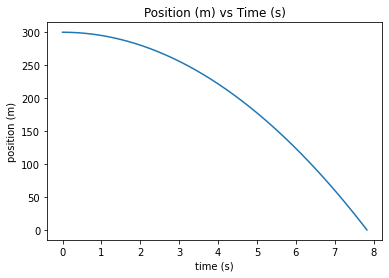

In [4]:
pyplot.plot(t_data, y_data)
pyplot.title('Position (m) vs Time (s)')
pyplot.xlabel('time (s)')
pyplot.ylabel('position (m)');

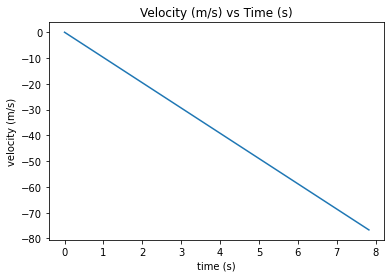

In [5]:
pyplot.plot(t_data,v_data);
pyplot.title('Velocity (m/s) vs Time (s)')
pyplot.xlabel('time (s)')
pyplot.ylabel('velocity (m/s)');

In [6]:
print(f'the final velocity is {v_data[-1]} at a height of {y_data[-1]}')

the final velocity is -76.68267697182117 at a height of -0.020973652211886636


Clearly this is not exactly zero height, but it is within 2 cm, so the impact velocity will be very close to this.

Next find the initial height such that the final velocity is more than 1 percent away from the constant-force problem. 
Strategy: find the final velocity in the constant force problem, and modify the while loop to run intil reaching the required threshold.

In [7]:
y0 = 300.
v0 = 0.
dt = .0005   
vn = v0
yn = y0

an = -9.8

v = [v0]   
y = [y0]
t = [0.]

i = 1   

In [8]:
while yn > 0.:
    yn = yn + vn*dt   
    
    y.append(yn)
    
    vn = vn + an*dt
    
    v.append(vn)
    
    t.append(i*dt)
    
    i = i + 1

t_const = np.array(t)
y_const = np.array(y)
v_const = np.array(v)

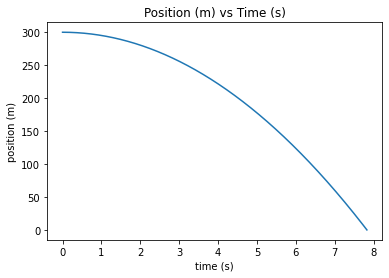

In [9]:
pyplot.plot(t_const, y_const)
pyplot.title('Position (m) vs Time (s)')
pyplot.xlabel('time (s)')
pyplot.ylabel('position (m)');

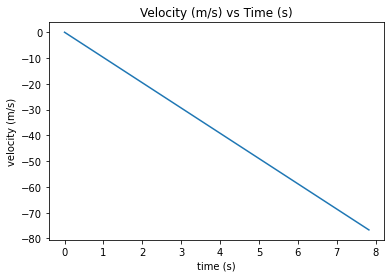

In [10]:
pyplot.plot(t_const, v_const);
pyplot.title('Velocity (m/s) vs Time (s)')
pyplot.xlabel('time (s)')
pyplot.ylabel('velocity (m/s)');

In [11]:
print(f'the final velocity is {v_const[-1]} at a height of {y_const[-1]}')

the final velocity is -76.68500000000786 at a height of -0.01089124997522388


## Note that the following code didn't work out how I wanted, but I decided to leave it in the assignment. I'll note where my actual progress picks up again. I want to troubleshoot it but didn't have time this weekend and wanted to move on to the actual assignment using objects anyway.

In [12]:
y0 = 300.   # Now we're actually initializing at this value
v0 = 0.
dt = .0005  
vn = v0
#yn = y0
R = 6.37E6
an = -9.8/(1. + yn/R)**2
  
dy0 = .001         # Define the size of the steps we will make in our choice of initial velocity

impacts = []  # declare an empty list to append final velocities
heights = []  # likewise make a list to contain the heights

y0i = y0   # need a value that can change within the loop

In [13]:
v_data1 = np.zeros(1)

v_const1 = np.zeros(1)

v_const1[0] = 1.
v_data1[0] = 1.

# need to define two identical arrays just to get the while loop below started
print(f'the first array is {v_data1} and the second is {v_const1}')

the first array is [1.] and the second is [1.]


In [14]:
while abs(v_data1[-1] - v_const1[-1])/abs(v_const1[-1]) < .01:
    
    print(f'The difference when initial height is {y0i} is {abs(v_data1[-1] - v_const1[-1])/abs(v_const1[-1])}')
    
    yn = y0i   # within loop, initialize the height at the value for that iteration
    print(f'y0i on this step is {yn}')
    v = [v0]   # need to re-initialize these lists at the start of each loop
    y = [y0i]
    t = [0.]
    i = 1
    
    while yn > 0.:      # This loop creates the data for the y-dependent force for y0i
        yn = yn + vn*dt   
    
        y.append(yn)
    
        vn = vn + an*dt
    
        v.append(vn)
    
        t.append(i*dt)
    
        i = i + 1

    t_data1 = np.array(t)  # Pass data to arrays
    y_data1 = np.array(y)
    v_data1 = np.array(v)
    
    impacts.append(v_data1[-1])
    heights.append(y0i)
    
    
    yc = y0i     # initialize values for the constant force problem
    vc = v0
    ac = -9.8
    vconst = [v0]
    yconst = [y0i]
    tconst = [0.]
    i = 1
    
    while yc > 0.:       # this loop creates constant force data: position, velocity, time
        yc = yc + vc*dt   
    
        yconst.append(yc)
    
        vc = vc + ac*dt
    
        vconst.append(vc)
    
        tconst.append(i*dt)
    
        i = i + 1
    
    v_const1 = np.array(vconst)  # pass data to arrays
    y_const = np.array(yconst)
    t_const = np.array(tconst)
    
    y0i = y0i + dy0

    print(f'The difference when initial height is {y0i} is {abs(v_data1[-1] - v_const1[-1])/abs(v_const1[-1])}')


The difference when initial height is 300.0 is 0.0
y0i on this step is 300.0
The difference when initial height is 300.001 is 3.4195154311384655e-09
The difference when initial height is 300.001 is 3.4195154311384655e-09
y0i on this step is 300.001
The difference when initial height is 300.00199999999995 is 0.4142492061144092


In [15]:
impact_data = np.array(impacts)
height_data = np.array(heights)

Text(0, 0.5, 'Final velocity')

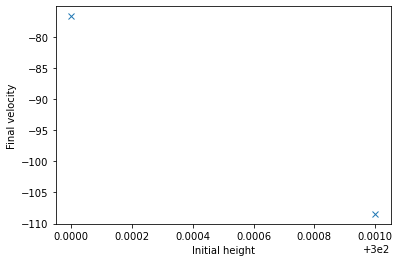

In [16]:
pyplot.plot(height_data, impact_data, 'x');
pyplot.xlabel('Initial height')
pyplot.ylabel('Final velocity')

Not exactly sure why, but this method isn't quite working for me. I will try the problem using an object-oriented approach now.

## The following code did what I expected the above code to do. This is where the actual assignment picks up again!

In [17]:
class particle(object):
    
    def __init__(self, mass=1., y=0., v=0.):
        self.mass = mass
        self.y = y
        self.v = v
        
    def euler(self, f, dt):
        self.y = self.y + self.v*dt
        self.v = self.v + f/self.mass*dt
        
    def euler_cromer(self, f, dt):
        self.v = self.v + f/self.mass*dt
        self.y = self.y + self.v*dt

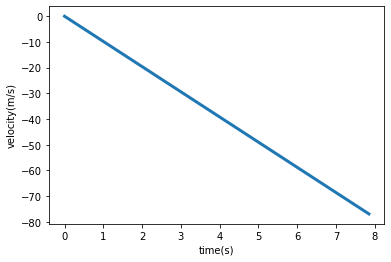

In [18]:
g = 9.8            # g acceleration
mass = 0.01        # mass of the particle
y0 = 300.          # initial position
v0 = 0.            # initial velocity

dt = .05
gforce = g*mass    # define the force: this one is constant

p = particle(mass, y0, v0)

y = [y0]           # define some lists to fill
v = [v0]
t = [0.]

while p.y > 0.:                     # run the loop as long as the particle's height is greater than 0
    fy = -gforce/(1. + p.y/R)**2     # force in y depends on particle's position
    p.euler(fy, dt)                 # use Euler as defined in particle object
    y.append(p.y)                   # append the particle position after Euler to the list
    v.append(p.v)                   # likewise for velocity
    t.append(t[-1]+dt)             # append the next time to the time list
    
    
t_data = np.array(t) # convert each list to an array as before
y_data = np.array(y)
v_data = np.array(v)

pyplot.plot(t_data, v_data, ls='-', lw=3)
pyplot.xlabel('time(s)')
pyplot.ylabel('velocity(m/s)');

In [19]:
print(f'The final velocity is {v_data[-1]}')
t_data

The final velocity is -76.92513874853837


array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
       1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
       1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05, 2.1 , 2.15,
       2.2 , 2.25, 2.3 , 2.35, 2.4 , 2.45, 2.5 , 2.55, 2.6 , 2.65, 2.7 ,
       2.75, 2.8 , 2.85, 2.9 , 2.95, 3.  , 3.05, 3.1 , 3.15, 3.2 , 3.25,
       3.3 , 3.35, 3.4 , 3.45, 3.5 , 3.55, 3.6 , 3.65, 3.7 , 3.75, 3.8 ,
       3.85, 3.9 , 3.95, 4.  , 4.05, 4.1 , 4.15, 4.2 , 4.25, 4.3 , 4.35,
       4.4 , 4.45, 4.5 , 4.55, 4.6 , 4.65, 4.7 , 4.75, 4.8 , 4.85, 4.9 ,
       4.95, 5.  , 5.05, 5.1 , 5.15, 5.2 , 5.25, 5.3 , 5.35, 5.4 , 5.45,
       5.5 , 5.55, 5.6 , 5.65, 5.7 , 5.75, 5.8 , 5.85, 5.9 , 5.95, 6.  ,
       6.05, 6.1 , 6.15, 6.2 , 6.25, 6.3 , 6.35, 6.4 , 6.45, 6.5 , 6.55,
       6.6 , 6.65, 6.7 , 6.75, 6.8 , 6.85, 6.9 , 6.95, 7.  , 7.05, 7.1 ,
       7.15, 7.2 , 7.25, 7.3 , 7.35, 7.4 , 7.45, 7.

This is what I found using the other method, which is promising.

Now find the height at which the two final velocities are 1% apart. I'll model my method off of the nested while loops I was attempting before.

In [20]:
v_1 = np.ones(2)
v_2 = np.ones(2)

In [21]:
g = 9.8            # g acceleration
mass = 0.01        # mass of the particle         
v0 = 0.            # initial velocity
y0 = 300
dy0 = 100         # how y0 is modified on each iteration
dt = .05
gforce = g*mass    



while abs((v_1[-1] - v_2[-1])/v_2[-1]) < .01:
    #print(y0)
   
    p1 = particle(mass, y0, v0)  # on the first loop, y0 = 300
    y1 = [y0]                    # redefine the lists at beginning of each loop with the new y0 value      
    v1 = [v0]
    t1 = [0.]

    while p1.y > 0.:                     
        fy = -gforce/(1. + p1.y/R)**2     
        p1.euler(fy, dt)                 
        y1.append(p1.y)                   
        v1.append(p1.v)                   
        t1.append(t1[-1]+dt)             
    
    t_1 = np.array(t1) 
    y_1 = np.array(y1)
    v_1 = np.array(v1)   # Compiles the values created in the inner loop into arrays
    
    p2 = particle(mass, y0)
    y2 = [y0]
    v2 = [v0]
    t2 = [0.]
    
    while p2.y > 0.:
        fy2 = -gforce    # This one is constant
        p2.euler(fy2, dt)
        y2.append(p2.y)
        v2.append(p2.v)
        t2.append(t2[-1] + dt)
        
    t_2 = np.array(t2)
    y_2 = np.array(y2)
    v_2 = np.array(v2)

    y0 = y0 + dy0
    


In [22]:
abs((v_1[-1] - v_2[-1])/v_2[-1])

0.010055374084181817

In [23]:
print(f'in steps of {dy0}m, the first height at which the difference is greater than 1% is {y0}m')

in steps of 100m, the first height at which the difference is greater than 1% is 127400m


It looks like this time it worked! I think the notation of this method made it easier to define the loops without making any mistakes. 

Next, consider a 2D trajectory (with air resistance) for a particle fired with some initial velocity. This time, take the gravitational force to be constant.

Define a new particle that can have positions and speeds in two dimensions rather than one.

## Starting here is where the drag force will need to be corrected!

In [24]:
class particle2(object):
    
    def __init__(self, mass=1., x=0., y=0., vx=0., vy=0.):
        self.mass = mass
        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy
       
    def euler(self, fx, fy, dt):
        self.vx = self.vx + fx/self.mass*dt
        self.vy = self.vy + fy/self.mass*dt
        self.x = self.x + self.vx*dt
        self.y = self.y + self.vy*dt

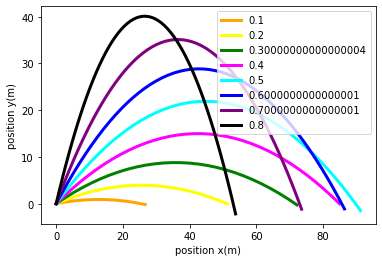

In [25]:
from matplotlib.colors import ColorConverter as cc
import math

g = 9.8            
v0 = 30.           

dt = 0.1           

colors = ['red','orange','yellow','green','magenta','cyan','blue','purple','black']

for angle in range(1,9):
    x = [0]                                  # initialize arrays for each angle
    y = [0]
    vx = [math.cos(angle*0.1*math.pi/2.)*v0]    # On each loop, the initial vx and vy depend on the angle and v0.
    vy = [math.sin(angle*0.1*math.pi/2.)*v0] 
    t = [0.]

    p = particle2(1., 0., 0., vx[0], vy[0])
    while p.y >= 0.:
        fy = -g
        p.euler(0., fy, dt)
        x.append(p.x)
        y.append(p.y)
        vx.append(p.vx)
        vy.append(p.vy)
        t.append(t[-1]+dt)
    
    t_data = np.array(t) 
    x_data = np.array(x)
    y_data = np.array(y)
    vx_data = np.array(vx)
    vy_data = np.array(vy)

    my_plot = pyplot.plot(x_data, y_data, color=(colors[angle]), ls='-', lw=3, label = str(angle*0.1))
    pyplot.legend()

pyplot.xlabel('position x(m)')
pyplot.ylabel('position y(m)');

For reference, this is what we did in class. I need to modify it to account for air resistance, and then modify it again to find the maximum range. This can be done by pulling out the maximum value of x for each angle, and then finding the maximum of those. For this to be reliable, I'll have to sample many angles.

## Air resistance below has been corrected where noted.

The drag is proportional to v^2 as (Fx,Fy)=-kv^2(cos(angle),sin(angle))=-kv^2(vx/v,vy/v). I had forgotten a square root. More importantly, I hadn't even called the x drag in the euler function, so my particle was slowing down in the y but was moving freely in the x. I noticed this by printing the initial and final x and y components of the velocity. Don't think I would have caught it otherwise.

The initial velocity was vx = 9.270509831248424 and vy = 28.531695488854606
The initial velocity was vx = 0.8762758854248327 and vy = -9.239574645449192


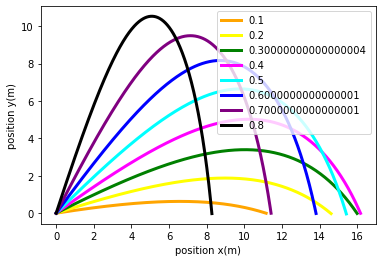

In [34]:
g = 9.8            
v0 = 30.  
k = 0.1    # define a drag coefficient. 

dt = 0.005  # I'm making the timestep small because I think my vx and vy are really going to be one step off from each other!     

colors = ['red','orange','yellow','green','magenta','cyan','blue','purple','black']

for angle in range(1,9):
    x = [0]                                  # initialize arrays for each angle
    y = [0]
    vx = [math.cos(angle*0.1*math.pi/2.)*v0]    # On each loop, the initial vx and vy depend on the angle and v0.
    vy = [math.sin(angle*0.1*math.pi/2.)*v0] 
    t = [0.]

    p = particle2(1., 0., 0., vx[0], vy[0])   # defining the mass as 1 simplifies notation
    while p.y >= 0.:
        fy = -g - k*((p.vx**2 + p.vy**2))**(1/2)*p.vy  
        fx = -k*(p.vx**2 + p.vy**2)**(1/2)*p.vx               # CORRECTED: was missing the square root   
        p.euler(fx, fy, dt)                         # CORRECTED: replaced 0. with fx in p.euler()
        x.append(p.x)
        y.append(p.y)
        vx.append(p.vx)
        vy.append(p.vy)
        t.append(t[-1]+dt)
    
    t_data = np.array(t) 
    x_data = np.array(x)
    y_data = np.array(y)
    vx_data = np.array(vx)
    vy_data = np.array(vy)

    my_plot = pyplot.plot(x_data, y_data, color=(colors[angle]), ls='-', lw=3, label = str(angle*0.1))
    pyplot.legend()

pyplot.xlabel('position x(m)')
pyplot.ylabel('position y(m)');

print(f'The initial velocity was vx = {vx_data[0]} and vy = {vy_data[0]}') # Added these statements to check slowing down or speeding up
print(f'The initial velocity was vx = {vx_data[-1]} and vy = {vy_data[-1]}')

## Above looks much better now. We can see from both the plot and from the initial and final velocities that it definitely is slowing down. It looks like it wasn't actually speeding up before - the problem was that it was only experiencing drag in the y. The motion in x was not changing because I'd left the Euler function with zero as the fx argument...

A concern: looking at the Euler function defined in the class, wouldn’t fx(vx, vy) and fy(vx, vy) mean that on a given step, I calculate vx for the NEXT step using the previous vx and vy (which is what I want) but then use THAT vx that was just calculated to find the next vy, so that they’re always out of step with each other by one dt? To mitigate this as much as possible, I'm using a very small timestep.

In any case, this looks believable. Now I need to pull out the maximum value from each set of x positions and compile those into their own list. Then I want to select the maximum value of that list as my maximum range. However, I first need to increase the number of angles sampled.

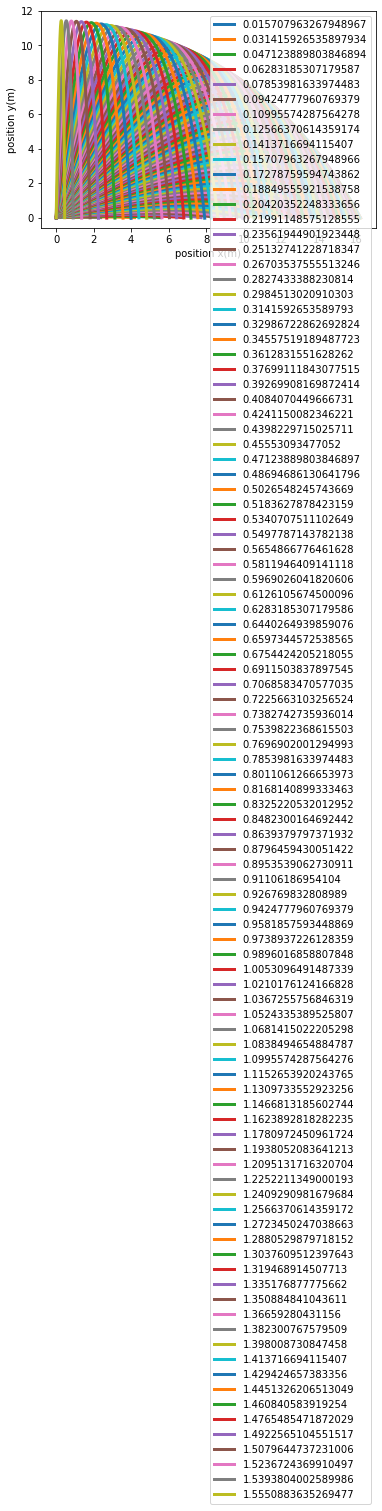

In [35]:
g = 9.8            
v0 = 30.  
k = 0.1    # define a drag coefficient. 

dt = 0.005  

n = 100      # number of angles we will sample
step = .01   # the spacing between the angles, in units of pi/2

# As I've defined it, I'll be sampling between 0 and pi/2

for angle in range(1,n):
    x = [0]                                  # initialize arrays for each angle
    y = [0]
    vx = [math.cos(angle*step*math.pi/2.)*v0]    # On each loop, the initial vx and vy depend on the angle and v0.
    vy = [math.sin(angle*step*math.pi/2.)*v0] 
    t = [0.]

    p = particle2(1., 0., 0., vx[0], vy[0])   # defining the mass as 1 simplifies notation
    while p.y >= 0.:
        fy = -g - k*((p.vx**2 + p.vy**2))**(1/2)*p.vy  # the force is now dependent on the particle's velocity
        fx = -k*(p.vx**2 + p.vy**2)**(1/2)*p.vx  # CORRECTED              
        p.euler(fx, fy, dt)                      # CORRECTED
        x.append(p.x)
        y.append(p.y)
        vx.append(p.vx)
        vy.append(p.vy)
        t.append(t[-1]+dt)
    
    t_data = np.array(t) 
    x_data = np.array(x)
    y_data = np.array(y)
    vx_data = np.array(vx)
    vy_data = np.array(vy)

    my_plot = pyplot.plot(x_data, y_data, ls='-', lw=3, label = str(angle*step*math.pi/2))
    pyplot.legend()

pyplot.xlabel('position x(m)')
pyplot.ylabel('position y(m)');

Looks like it's doing what I expected! Now modify the code again to extract the maximum range. As an added bonus, it's very pretty.

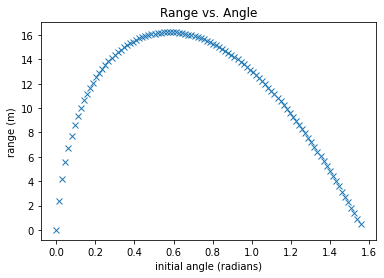

In [42]:
g = 9.8            
v0 = 30.  
k = 0.1    # define a drag coefficient. 

dt = 0.005  

n = 100      # number of angles we will sample
step = .01   # the spacing between the angles, in units of pi/2

mx = [0.]  # define lists of max values and angles
ang = [0.] 

for angle in range(1,n):
    x = [0]                                  # initialize arrays for each angle
    y = [0]
    vx = [math.cos(angle*step*math.pi/2.)*v0]    # On each loop, the initial vx and vy depend on the angle and v0.
    vy = [math.sin(angle*step*math.pi/2.)*v0] 
    t = [0.]

    p = particle2(1., 0., 0., vx[0], vy[0])   # defining the mass as 1 simplifies notation
    while p.y >= 0.:
        fy = -g - k*((p.vx**2 + p.vy**2))**(1/2)*p.vy  # the force is now dependent on the particle's velocity
        fx = -k*p.vx*(p.vx**2 + p.vy**2)**(1/2)   # CORRECTED             
        p.euler(fx, fy, dt)                       # CORRECTED
        x.append(p.x)
        y.append(p.y)
        vx.append(p.vx)
        vy.append(p.vy)
        t.append(t[-1]+dt)
        
    mx.append(max(x))
    ang.append(angle*step*math.pi/2)    # Make lists of the maximum x value and corresponding angle
    
    t_data = np.array(t) 
    x_data = np.array(x)
    y_data = np.array(y)
    vx_data = np.array(vx)
    vy_data = np.array(vy)
    
angles = np.array(ang)
max_x = np.array(mx)       # Pass angles and ranges to arrays for plotting

pyplot.plot(angles, max_x, 'x')
pyplot.xlabel('initial angle (radians)')
pyplot.ylabel('range (m)')
pyplot.title('Range vs. Angle');

## Obviously, after including air resistance in the x the maximum range is much shorter.

In [43]:
print(f'The maximum range with air resistance is {max(mx)}m.')

The maximum range with air resistance is 16.225359902802452m.


In [44]:
val, idx = max((val, idx) for (idx, val) in enumerate(mx))  # Finding the index of the maximum value in the range list

In [45]:
print(val)
print(idx)

16.225359902802452
37


In [46]:
print(f'The angle at which the maximum range occurs is {angles[idx]} radians, or {angles[idx]*180/(math.pi)} degrees.')

The angle at which the maximum range occurs is 0.5811946409141118 radians, or 33.300000000000004 degrees.


Interestingly, the maximum range occurs at less than 45 degrees.